In [1]:
import nltk
from nltk.corpus import stopwords
import numpy as np
from typing import List
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
def filter_stop_words(text: List[str])->List[str]:
    stop_words = set(stopwords.words("english"))
    return [word for word in text if word not in stop_words]


dialogues = pd.read_csv('../emo_context_train.txt', sep="\t")
class_counts = dialogues["label"].value_counts()

# Print the class counts
print("class counts: ",class_counts)
# include "others" label or no
dialogues = dialogues[dialogues["label"]!="others"]
labels = dialogues.label
cols = ["turn1", "turn2", "turn3"]
dialogues["combined"] = dialogues[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
#dialogues["combined"] = dialogues["combined"].apply(str.lower).apply(word_tokenize).apply(filter_stop_words).apply(lambda x: " ".join(x))
dialogues["combined"] = dialogues["combined"].apply(str.lower).apply(word_tokenize).apply(lambda x: " ".join(x))
dialogues["seq_len"] = dialogues["combined"].apply(len)

max_len = dialogues["seq_len"].max()
input_text = dialogues.combined.values
tokenized = []
for sen in input_text:
    tokenized.append(sen.split())

class counts:  others    14948
angry      5506
sad        5463
happy      4243
Name: label, dtype: int64
Index(['id', 'turn1', 'turn2', 'turn3', 'label', 'combined', 'seq_len'], dtype='object')


In [4]:
text_transformer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)
train_data, val_data, train_labels, val_labels = train_test_split(input_text, labels, test_size=0.2, random_state=42)
X_train_text = text_transformer.fit_transform(train_data)
X_test_text = text_transformer.transform(val_data)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

clf = LogisticRegression()
clf.fit(X_train_text, train_labels)
y_val_pred = clf.predict(X_test_text)
print("accuracy: ",accuracy_score(val_labels, y_val_pred))
print("F1 score: ",f1_score(val_labels, y_val_pred, average="macro"))

accuracy:  0.7801724137931034
F1 score:  0.7467763053856613


/Users/nina/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import sklearn

array([[ 819,   13,  246,   44],
       [  19,  451,  311,   30],
       [  84,  120, 2687,   88],
       [  27,   19,  325,  749]])

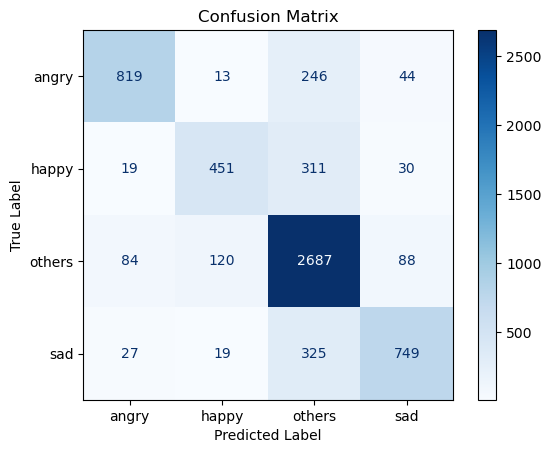

['angry' 'happy' 'others' 'sad']


In [7]:
confusion_matrix = sklearn.metrics.confusion_matrix(val_labels, y_val_pred, labels=clf.classes_)
display(confusion_matrix)
color = 'black'

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=clf.classes_)
cm_display.plot(cmap=plt.cm.Blues)
cm_display.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
print(clf.classes_)

In [8]:
from sklearn.metrics import classification_report
 
print(classification_report(val_labels, y_val_pred))

              precision    recall  f1-score   support

       angry       0.86      0.73      0.79      1122
       happy       0.75      0.56      0.64       811
      others       0.75      0.90      0.82      2979
         sad       0.82      0.67      0.74      1120

    accuracy                           0.78      6032
   macro avg       0.80      0.71      0.75      6032
weighted avg       0.79      0.78      0.78      6032

